In [280]:
from sklearn.datasets import make_classification
import numpy as np

In [281]:

X,Y=make_classification(n_samples=400, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=1, weights=None, flip_y=0.01, class_sep=1.0, hypercube=True, shift=0.0, scale=1.0, shuffle=True, random_state=3)

In [282]:
import matplotlib.pyplot as plt

In [283]:
print(X.shape,Y.shape)

(400, 2) (400,)


In [365]:
Y[Y==[0]]=-1

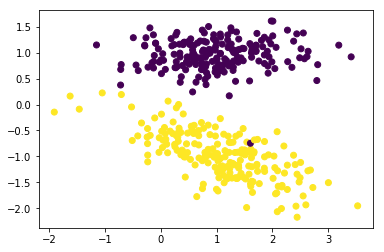

In [366]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [367]:
x=0
ti=(np.dot(X[x].reshape(1,-1),W)+b)

In [368]:
ti[0]*Y[0]

array([0.29171351])

In [369]:
class mysvm:
    def __init__(self,C=1.0):
        self.C=C
        self.W=0
        self.b=0
    def hingeloss (self,X,Y,W,b):
        loss=0
        loss+=0.5*np.dot(W.T,W)[0][0]
        m=X.shape[0]
        for x in range(m):
            ti=Y[x]*(np.dot(X[x].reshape(1,-1),W)+b)
            ti=ti[0]#shape W=[2,1] and X[0]=[2,]
            loss+=self.C*max(0,(1-ti))
        return loss
    
    def fit(self,X,Y,batch_size=100,learning_rate=0.0001,max_itr=10):#mini batch
        b=0.0
        no_of_samples=X.shape[0]
        no_of_features=X.shape[1]
        n=learning_rate
        c=self.C
        W=np.zeros((no_of_features,1))
        losses=[]
        for i in range(max_itr):
            #losses=[]
            l=self.hingeloss(X,Y,W,b)
            losses.append(l)
            #mini batch it must be
            ids=np.arange(no_of_samples)
            np.random.shuffle(ids)
            for batch_start in range(0,no_of_samples,batch_size):
                gradw=0
                gradb=0
                for  j in range(batch_start,batch_start+batch_size):
                    if j<no_of_samples:#too avoid if batchstart=No_of_samples
                        idx=ids[j]
                        ti=Y[idx]*(np.dot(X[idx].reshape(1,-1),W)+b)[0][0]
                        #loss=c*max(0,1-ti)
                        if ti>1:
                            gradw+=0
                            gradb+=0
                        else:
                            gradw+=c*Y[idx]*X[idx].reshape(1,-1).T
                            gradb+=c*Y[idx]
                W=W-n*W+n*gradw
                b=b+n*gradb
        self.W=W
        self.b=b
        return W,b,losses
            

In [370]:
#W=np.zeros((X.shape[1],1))
#b=0.0

In [371]:
A=mysvm(C=1)

In [391]:
W,B,L=A.fit(X,Y,learning_rate=0.01,max_itr=200)

In [392]:
L

[array([400.]),
 array([24.91351337]),
 array([19.36110213]),
 array([17.85156158]),
 array([16.65025201]),
 array([15.88160752]),
 array([15.50650765]),
 array([15.23165753]),
 array([15.03194422]),
 array([14.83332567]),
 array([14.77126425]),
 array([14.70679909]),
 array([14.61179346]),
 array([14.58962949]),
 array([14.56838125]),
 array([14.51850253]),
 array([14.45676418]),
 array([14.4969425]),
 array([14.51475408]),
 array([14.45018516]),
 array([14.43637917]),
 array([14.47441431]),
 array([14.48420327]),
 array([14.45954794]),
 array([14.38975064]),
 array([14.35451298]),
 array([14.34081508]),
 array([14.35915713]),
 array([14.35227613]),
 array([14.40314671]),
 array([14.48506358]),
 array([14.36696433]),
 array([14.38286784]),
 array([14.36517977]),
 array([14.39866342]),
 array([14.41819634]),
 array([14.36349834]),
 array([14.37930302]),
 array([14.35745196]),
 array([14.41903533]),
 array([14.44404461]),
 array([14.41252902]),
 array([14.42023064]),
 array([14.33350229

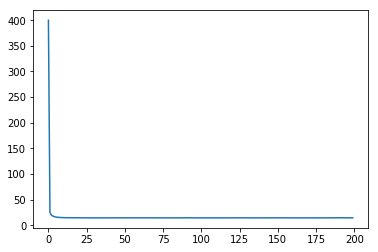

In [393]:
plt.plot(L)

In [394]:
W

array([[-0.33957165],
       [-2.10755436]])

In [395]:
def plotHyperplane(w1,w2,b):
    plt.figure(figsize=(20,20))
    x_1 = np.linspace(-2,4,10)
    x_2 = -(w1*x_1+b)/w2
    
    positive_plane = -(w1*x_1 + b +1)/w2
    negative_plane = -(w1*x_1+b-1)/w2
    
    plt.plot(x_1,x_2,label="HyperPlane")
    plt.plot(x_1,positive_plane,label="Positive Plane")
    plt.plot(x_1,negative_plane,label="Negative Plane")
    plt.legend()
    plt.scatter(X[:,0],X[:,1],c=Y)
    plt.show()

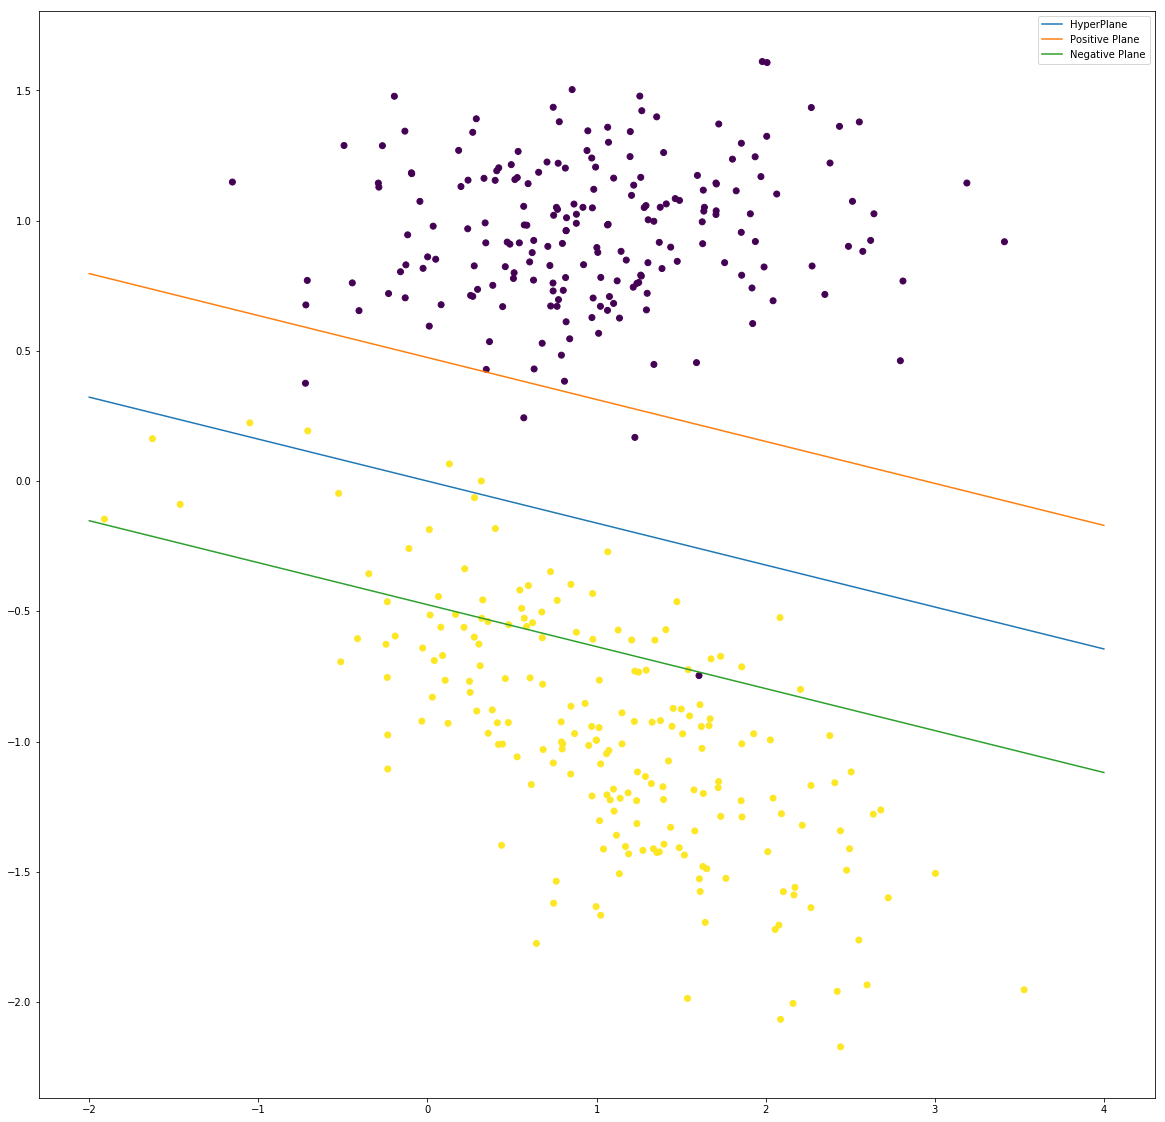

In [396]:
plotHyperplane(W[0,0],W[1,0],b)

In [364]:
B

1.0860999999999674